<a href="https://colab.research.google.com/github/jagatabhay/TSAI/blob/master/S8/S8-Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving RestNetModel.py to RestNetModel.py


{'RestNetModel.py': b'import torch\r\nimport torch.nn as nn\r\nimport torch.nn.functional as F\r\n\r\n\r\nclass BasicBlock(nn.Module):\r\n    expansion = 1\r\n\r\n    def __init__(self, in_planes, planes, stride=1):\r\n        super(BasicBlock, self).__init__()\r\n        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)\r\n        self.bn1 = nn.BatchNorm2d(planes)\r\n        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,stride=1, padding=1, bias=False)\r\n        self.bn2 = nn.BatchNorm2d(planes)\r\n        self.shortcut = nn.Sequential()\r\n        if stride != 1 or in_planes != self.expansion*planes:\r\n            self.shortcut = nn.Sequential(nn.Conv2d(in_planes, self.expansion*planes,kernel_size=1, stride=stride, bias=False),\r\n                                          nn.BatchNorm2d(self.expansion*planes)\r\n                                          )\r\n\r\n    def forward(self, x):\r\n        out = F.relu(self.bn1(self.conv1

In [0]:
from RestNetModel import *

In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Devive : ", device)
net = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)
summary(net, input_size=(3, 32, 32))

Devive :  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14    

In [4]:
%matplotlib inline
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose( [transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_transform = transforms.Compose( [transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.RandomCrop(32, padding=2),
                                       transforms.ColorJitter(brightness=0.1, contrast=0.1,saturation=0.1,hue=0.1),
                                       #transforms.RandomRotation( degrees = 7 ),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=True,
                                        transform = train_transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 30,
                                          shuffle=True, 
                                          num_workers = 4)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 30,
                                         shuffle=False,
                                         num_workers = 4)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  dog   car   car truck


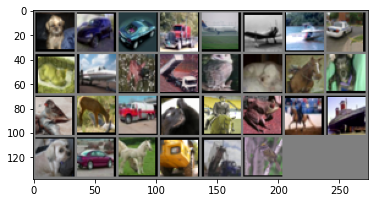

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9 , weight_decay = 0.001 )
scheduler= StepLR(optimizer,step_size=5,gamma=0.1)
print("Device : ", device)

Device :  cuda


In [7]:
import time
start_time = time.time()
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data[0].to(device) , data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 300 == 299:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0


[1,   300] loss: 1.835
[1,   600] loss: 1.530
[1,   900] loss: 1.385
[1,  1200] loss: 1.260
[1,  1500] loss: 1.190
[2,   300] loss: 1.047
[2,   600] loss: 0.994
[2,   900] loss: 0.920
[2,  1200] loss: 0.868
[2,  1500] loss: 0.860
[3,   300] loss: 0.760
[3,   600] loss: 0.756
[3,   900] loss: 0.732
[3,  1200] loss: 0.718
[3,  1500] loss: 0.706
[4,   300] loss: 0.631
[4,   600] loss: 0.625
[4,   900] loss: 0.622
[4,  1200] loss: 0.618
[4,  1500] loss: 0.613
[5,   300] loss: 0.557
[5,   600] loss: 0.539
[5,   900] loss: 0.531
[5,  1200] loss: 0.558
[5,  1500] loss: 0.557
[6,   300] loss: 0.489
[6,   600] loss: 0.497
[6,   900] loss: 0.477
[6,  1200] loss: 0.488
[6,  1500] loss: 0.496
[7,   300] loss: 0.427
[7,   600] loss: 0.454
[7,   900] loss: 0.450
[7,  1200] loss: 0.464
[7,  1500] loss: 0.431
[8,   300] loss: 0.404
[8,   600] loss: 0.397
[8,   900] loss: 0.421
[8,  1200] loss: 0.399
[8,  1500] loss: 0.418
[9,   300] loss: 0.368
[9,   600] loss: 0.387
[9,   900] loss: 0.369
[9,  1200] 

In [8]:
stop_time = time.time()
print("Time Taken To Train Time : ", stop_time - start_time)

Time Taken To Train Time :  1271.6143927574158


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device) , data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %


In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device) , data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 89 %
Accuracy of   car : 93 %
Accuracy of  bird : 86 %
Accuracy of   cat : 69 %
Accuracy of  deer : 84 %
Accuracy of   dog : 84 %
Accuracy of  frog : 95 %
Accuracy of horse : 89 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %
